In [18]:
#q1
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Combine text columns
texts_combined = data['Wow!'].tolist() + data['वाह!'].tolist()

# Convert text to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(texts_combined).toarray()

# Split data into two classes
split_index = len(data)
class_one, class_two = X_transformed[:split_index], X_transformed[split_index:]

# Calculate the mean (centroid) for each class
centroid_one = np.mean(class_one, axis=0)
centroid_two = np.mean(class_two, axis=0)

# Calculate the standard deviation (spread) for each class
spread_class_one = np.std(class_one, axis=0)
spread_class_two = np.std(class_two, axis=0)

# Calculate the distance between centroids
centroid_distance = np.linalg.norm(centroid_one - centroid_two)

# Output the results
print("Centroid for Class 1:", centroid_one)
print("Centroid for Class 2:", centroid_two)
print("Spread for Class 1:", spread_class_one)
print("Spread for Class 2:", spread_class_two)
print("Distance between Centroids:", centroid_distance)


Centroid for Class 1: [0.00065359 0.0003268  0.00130719 ... 0.         0.         0.        ]
Centroid for Class 2: [0.        0.        0.        ... 0.0003268 0.0003268 0.0003268]
Spread for Class 1: [0.02555714 0.01807458 0.03613144 ... 0.         0.         0.        ]
Spread for Class 2: [0.         0.         0.         ... 0.01807458 0.01807458 0.01807458]
Distance between Centroids: 0.6274465549952872


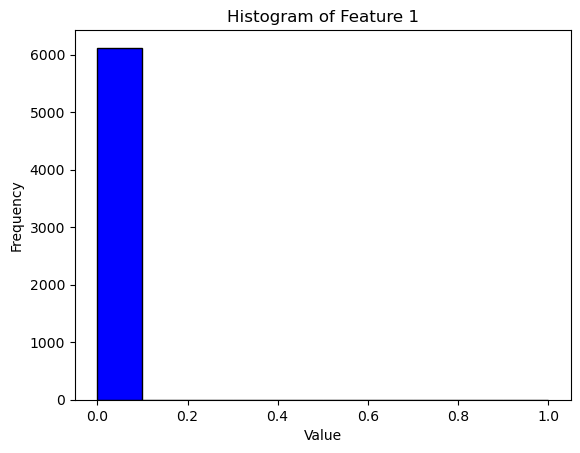

Mean of Feature 1: 0.000326797385620915
Variance of Feature 1: 0.00032669058908966646


In [19]:
#q2
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Select a feature (choose feature index 0 for demonstration)
feature_index = 0
selected_feature = X_transformed[:, feature_index]

# Calculate histogram data
hist_values, bin_edges = np.histogram(selected_feature, bins=10)

# Plot histogram
plt.hist(selected_feature, bins=10, color='blue', edgecolor='black')
plt.title(f"Histogram of Feature {feature_index + 1}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Calculate mean and variance of the selected feature
feature_mean = np.mean(selected_feature)
feature_variance = np.var(selected_feature)

# Output the results
print(f"Mean of Feature {feature_index + 1}:", feature_mean)
print(f"Variance of Feature {feature_index + 1}:", feature_variance)

     

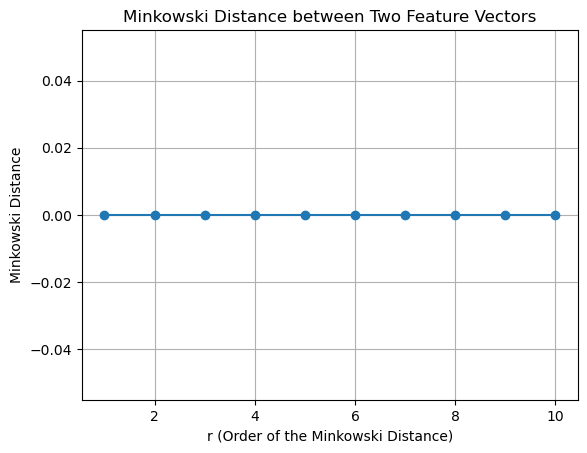

Minkowski Distance with r=1: 0.0
Minkowski Distance with r=2: 0.0
Minkowski Distance with r=3: 0.0
Minkowski Distance with r=4: 0.0
Minkowski Distance with r=5: 0.0
Minkowski Distance with r=6: 0.0
Minkowski Distance with r=7: 0.0
Minkowski Distance with r=8: 0.0
Minkowski Distance with r=9: 0.0
Minkowski Distance with r=10: 0.0


In [13]:
#q3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer

# Load the data

data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Select any two feature vectors (rows) from the dataset
feature_vector_one = X_transformed[0]  # First row
feature_vector_two = X_transformed[1]  # Second row

# Calculate Minkowski distances for r values from 1 to 10
r_values = range(1, 11)
minkowski_distances = [distance.minkowski(feature_vector_one, feature_vector_two, p=r) for r in r_values]

# Plot the Minkowski distances against r values
plt.plot(r_values, minkowski_distances, marker='o')
plt.title("Minkowski Distance between Two Feature Vectors")
plt.xlabel("r (Order of the Minkowski Distance)")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.show()

# Output the distances for reference
for r, dist in zip(r_values, minkowski_distances):
    print(f"Minkowski Distance with r={r}: {dist}")


In [14]:
#q4
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Load the data

data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Create labels (y) corresponding to each class
labels = [0] * len(data) + [1] * len(data)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train shape: (4896, 3096)
X_test shape: (1224, 3096)
y_train length: 4896
y_test length: 1224


In [15]:
#q5, q6, q7
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data

data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Create labels (y) corresponding to each class
labels = [0] * len(data) + [1] * len(data)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

# Initialize the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
model_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", model_accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7116013071895425
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62       637
           1       0.62      1.00      0.77       587

    accuracy                           0.71      1224
   macro avg       0.81      0.72      0.69      1224
weighted avg       0.82      0.71      0.69      1224



Accuracy for k=1: 0.8162
Accuracy for k=2: 0.8292
Accuracy for k=3: 0.7116
Accuracy for k=4: 0.7051
Accuracy for k=5: 0.6454
Accuracy for k=6: 0.6511
Accuracy for k=7: 0.6127
Accuracy for k=8: 0.6168
Accuracy for k=9: 0.5956
Accuracy for k=10: 0.6005
Accuracy for k=11: 0.5866


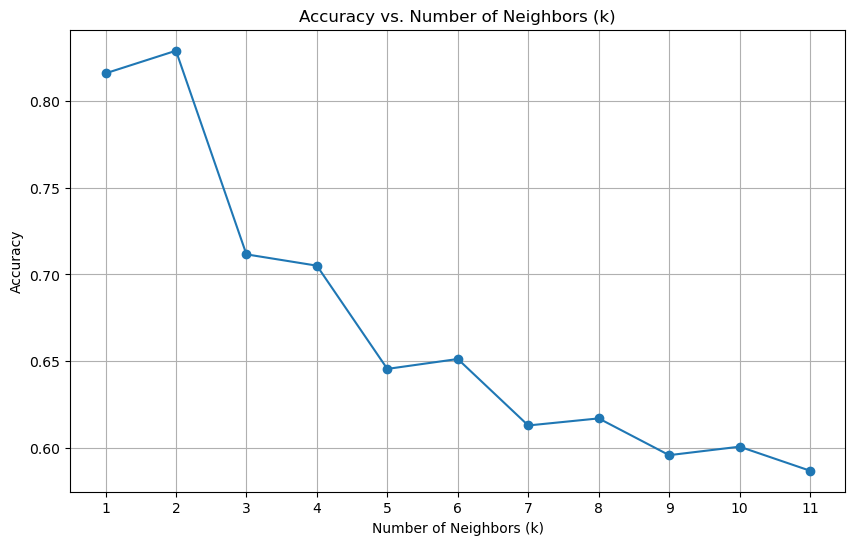

In [16]:
#q8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the data

data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Create labels (y) corresponding to each class
labels = [0] * len(data) + [1] * len(data)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

# Initialize lists to store results
k_values = range(1, 12)
accuracy_scores = []

# Train and evaluate kNN classifiers for k from 1 to 11
for k in k_values:
    # Initialize the kNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict the labels on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Print accuracy for current k
    print(f"Accuracy for k={k}: {accuracy:.4f}")

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


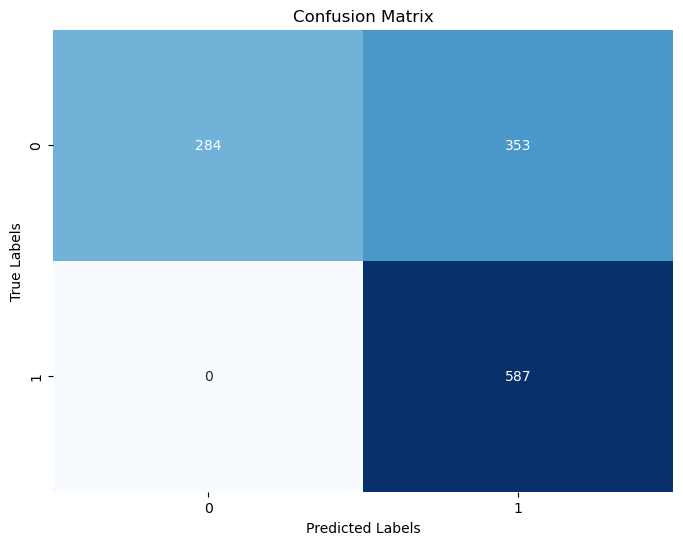

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62       637
           1       0.62      1.00      0.77       587

    accuracy                           0.71      1224
   macro avg       0.81      0.72      0.69      1224
weighted avg       0.82      0.71      0.69      1224



In [17]:
#q9
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Create labels (y) corresponding to each class
labels = [0] * len(data) + [1] * len(data)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

# Initialize the kNN classifier with k=3 (as an example)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Output classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
